<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>[Insert your name here]</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Tuesday, May 31, 2022, 11:59 PM**


* Total marks: 47


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [10 marks]

Consider the California housing data from Homework 1 using the same training and test set there. Here, we split off 20% of the training set as a validation set, and keep the remaining 80% as the actual training set.  The following code replicates the preprocessing of the dataset from Homework 1, creating the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`. The target variable has been divided by 100,000.

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.2 MB/s 


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

import os
import tarfile
from six.moves import urllib

HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

HOUSING_URL = ("https://raw.githubusercontent.com/ageron/"+
               "handson-ml2/master/datasets/housing/housing.tgz")
fetch_housing_data(HOUSING_URL)
data = load_housing_data()

data["income_cat"] = np.ceil(data["median_income"] / 1.5)
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
# Split the traning set into training and validation    
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index2, valid_index in split2.split(strat_train_set, strat_train_set["income_cat"]):
    strat_train2_set = strat_train_set.iloc[train_index2]
    strat_valid_set = strat_train_set.iloc[valid_index]
    
strat_train_set = strat_train2_set.copy().drop("income_cat", axis=1)
strat_valid_set = strat_valid_set.copy().drop("income_cat", axis=1)
strat_test_set = strat_test_set.copy().drop("income_cat", axis=1)

X_raw = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()/100000

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_features = X_raw.drop("ocean_proximity", axis=1)
num_attribs = list(num_features)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Apply the pipeline to the training set
X_train = full_pipeline.fit_transform(X_raw)

# Apply the pipeline to the validation set
X_valid_raw = strat_valid_set.drop("median_house_value", axis=1)
y_valid = strat_valid_set["median_house_value"].copy()/100000
X_valid = full_pipeline.transform(X_valid_raw)

# Apply the pipeline to the validation set
X_test_raw = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()/100000
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set.

Hint: In the `.compile()` method, use `loss="mse"`.

**[Add your solution here]**

In [13]:
from tensorflow.keras import Sequential, layers
mlp = Sequential([layers.Dense(50, activation="relu",
                               kernel_initializer="he_normal"),
                  layers.Dense(1, activation="relu")])

mlp.compile(optimizer='Nadam',
            loss='mse')

In [14]:
mlp.fit(X_train, y_train, epochs=30,
          validation_data=(X_valid, y_valid))

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 1.1045 - val_loss: 0.5694
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4853 - val_loss: 0.4686
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4348 - val_loss: 0.4397
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4138 - val_loss: 0.4175
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4007 - val_loss: 0.4044
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3891 - val_loss: 0.3949
Epoch 7/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.3879
Epoch 8/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3734 - val_loss: 0.3795
Epoch 9/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3676 - val_loss: 0.3738
Epoch 10/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3622 - val_loss: 0.3694

In [16]:
mse_act = mlp.evaluate(X_valid, y_valid)
print(mse_act)

104/104 [==============================] - 0s 1ms/step - loss: 0.3379
0.3379059135913849


As using ReLU activation function, the MSE is 0.3379059135913849
.

In [17]:
from tensorflow.keras import Sequential, layers
mlp2 = Sequential([
    layers.Dense(50, activation="relu",
                 kernel_initializer="he_normal"),
    layers.Dense(1, activation= None )
])

In [18]:
mlp2.compile(optimizer='Nadam',
            loss='mse')
mlp2.fit(X_train, y_train, 
            epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 1.1334 - val_loss: 0.5339
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4475 - val_loss: 0.4407
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4061 - val_loss: 0.4178
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3891 - val_loss: 0.3980
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3779 - val_loss: 0.3849
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 0.3803
Epoch 7/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3622 - val_loss: 0.3705
Epoch 8/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3568 - val_loss: 0.3662
Epoch 9/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3533 - val_loss: 0.3648
Epoch 10/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3503 - val_loss: 0.3605

In [19]:
mse_non_act = mlp2.evaluate(X_valid, y_valid)
print(mse_non_act)

104/104 [==============================] - 0s 1ms/step - loss: 0.3360
0.3359699845314026


As using ReLU non-activation function, the MSE of test set is 0.3359699845314026.

Conclusion: The MSE of outlayer with no activation function and with activation function are very close. The outlayer with no activation function has smaller MSE. 

## (b) [5 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb) on the textbook website. Then use a randomized search to search for the best number of hidden layers, neurons per hidden layer, and learning rate. For the randomized search use 3-fold CV, with 10 iterations, with the number of hidden layers uniformly sampled from $\{0,1,2,3\}$, the number of neurons per layer uniformly from $\{1,2,\dots,100\}$, and the learning rate from the distribution `reciprocal(3e-4, 3e-2)`. Use early stopping with `patience=10`.

**[Add your solution here]**

In [20]:
def build_model(n_hidden, n_neurons, learning_rate, input_shape=[13]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [21]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [22]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 101).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/30
276/276 [==============================] - 1s 2ms/step - loss: 0.6521 - val_loss: 0.4759
Epoch 2/30
276/276 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4373
Epoch 3/30
276/276 [==============================] - 1s 2ms/step - loss: 0.4107 - val_loss: 0.4161
Epoch 4/30
276/276 [==============================] - 1s 2ms/step - loss: 0.3959 - val_loss: 0.4018
Epoch 5/30
276/276 [==============================] - 1s 2ms/step - loss: 0.3869 - val_loss: 0.3908
Epoch 6/30
276/276 [==============================] - 1s 2ms/step - loss: 0.3809 - val_loss: 0.3834
Epoch 7/30
276/276 [==============================] - 1s 2ms/step - loss: 0.3738 - val_loss: 0.3818
Epoch 8/30
276/276 [==============================] - 1s 2ms/step - loss: 0.3689 - val_loss: 0.4039
Epoch 9/30
276/276 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 0.3704
Epoch 10/30
276/276 [==================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f99c0ed9ed0>,
                   param_distributions={'learning_rate': [0.018660324072369908,
                                                          0.007644504723105013,
                                                          0.0006520854051037825,
                                                          0.018195520549468946,
                                                          0.007759773905501517,
                                                          0.002416434498857632,
                                                          0.028154254335988504,
                                                          0.01236727955030516,
                                                          0.001430026349082893,
                                                          0.004085515660209816,
                                                          0...
            

In [23]:
rnd_search_cv.best_params_

{'learning_rate': 0.026493843442839206, 'n_hidden': 2, 'n_neurons': 42}

## (c) [1 mark]

Plot the learning curves for the best model in (c). Does it look like the model is overfitting?

**[Add your solution here]**

In [24]:
best_model = rnd_search_cv.best_estimator_.model

In [25]:
res = best_model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid))

Epoch 1/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2830 - val_loss: 0.3147
Epoch 2/30
413/413 [==============================] - 1s 3ms/step - loss: 0.2802 - val_loss: 0.3094
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2788 - val_loss: 0.3023
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2780 - val_loss: 0.2922
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2783 - val_loss: 0.2957
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2783 - val_loss: 0.3018
Epoch 7/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2813 - val_loss: 0.2940
Epoch 8/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2766 - val_loss: 0.2922
Epoch 9/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2732 - val_loss: 0.2882
Epoch 10/30
413/413 [==============================] - 1s 2ms/step - loss: 0.2695 - val_loss: 0.2890

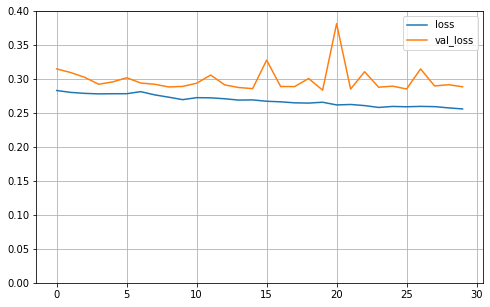

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.4)
plt.show()

Yes, the model looks like overfitting.

# 2. Binary classification DNN [23 marks]

Consider the [Caravan insurance data](https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/). The data gives sociodemographic and product ownership data from customers of an insurance company, some of which purchased caravan insurance. You can read ther data description from that website. Download the data as a csv file from [Canvas](https://canvas.uw.edu/files/92281351/download?download_frd=1).

The target variable is `Purchase`, which is binary and you should convert it to 1 for `Yes` and 0 for `No`.

## (a) [3 marks]

Load, split and preprocess the data. In particular, for the splitting, you will need to create a test set (20% of the full data), a validation set (20% of the remaining data after creating the test set), and a training set, and stratify using the target variable because this is an imbalanced dataset. For both splits, use `random_state=42`. The features `MOSTYPE` and `MOSHOOFD` are categorical so one hot encoding needs to be applied to them. All other features are numerical so a standard scaler needs to be applied to them. Print the training set `X_train`, `y_train` using `print()`.

**[Add your solution here]**

In [84]:
X_raw = pd.read_csv("caravan.csv")
from sklearn.model_selection import StratifiedShuffleSplit

# split raw data set into 20% test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_raw, X_raw["Purchase"]):
    strat_train_set = X_raw.loc[train_index]
    strat_test_set_1 = X_raw.loc[test_index]

# split the remaining 20% data after creating the test set into validation set
# and the training set
for valid_index, train_index in split.split(strat_test_set_1,
                                            strat_test_set_1["Purchase"]):
    strat_test_set = strat_test_set_1.iloc[valid_index]
    strat_valid_set = strat_test_set_1.iloc[train_index]

In [85]:
X_train_new = strat_train_set.drop("Purchase", axis=1)
y_train = (strat_train_set["Purchase"] == "Yes") + 0

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
X_train_new_num = X_train_new.drop(["MOSTYPE", "MOSHOOFD"], axis=1)
num_attribs = list(X_train_new_num)
cat_attribs = ["MOSTYPE", "MOSHOOFD"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [87]:
X_train = full_pipeline.fit_transform(X_train_new)

X_test_new = strat_test_set.drop("Purchase", axis=1)
y_test = (strat_test_set["Purchase"] == "Yes") + 0
X_test = full_pipeline.transform(X_test_new)

X_valid_new = strat_valid_set.drop("Purchase", axis=1)
y_valid = (strat_valid_set["Purchase"] == "Yes") + 0
X_valid = full_pipeline.transform(X_valid_new)

In [88]:
print(X_train)

[[-0.27440493 -0.85901763  0.0055585  ...  1.          0.
   0.        ]
 [-0.27440493  0.40694601  0.0055585  ...  1.          0.
   0.        ]
 [-0.27440493  0.40694601  0.0055585  ...  1.          0.
   0.        ]
 ...
 [-0.27440493 -0.85901763  0.0055585  ...  0.          1.
   0.        ]
 [-0.27440493 -0.85901763  2.4708858  ...  1.          0.
   0.        ]
 [-0.27440493  0.40694601  1.23822215 ...  1.          0.
   0.        ]]


In [89]:
print(y_train)

198     0
676     0
330     0
1231    0
5545    0
       ..
5341    0
1486    0
5077    0
1170    0
5819    1
Name: Purchase, Length: 4657, dtype: int64


## (b) [3 marks]

In the next part (c), you will build and fit a DNN with 5 hidden layers of 200, 200, 100, 100, 50 neurons, respectively. Use the following specifications:

(i) He initialization and the ELU activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]` (which is ROC AUC).

In this question, explain why the choices (i), (ii), and (iii) are justified.

**[Add your solution here]**

Since the ELU has negative values, which allows ELU not only has lower computational complecity but also with close zero mean unit activation, like batch nomalization does.
The He initialization takes into account the non-linearity of activation functions. So it is suitable for using both ELU and He initialization. Since there is only one target variable, the output layer has one neuron with sigmoid activation. Hence, we should compile with command "loss="binary_crossentropy" and metrics=["AUC"]. 

## (c) [3 marks]

Train the model in (b) for 30 epochs and use exponential scheduling and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

In [33]:
import random as python_random

def reset_session(seed=42):
    tf.random.set_seed(seed)
    python_random.seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

**[Add your solution here]**

In [34]:
def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay(lr0=0.01,s=20))

In [35]:
reset_session()
model = keras.models.Sequential()
model.add(keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal"))

In [36]:
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [37]:
optimizer= keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", 
              optimizer=optimizer, 
              metrics=["AUC"])

In [38]:
model.evaluate(X_train, y_train)

146/146 [==============================] - 1s 3ms/step - loss: 0.8543 - auc: 0.5159


[0.8543457388877869, 0.5158929824829102]

In [39]:
model.evaluate(X_valid, y_valid)

8/8 [==============================] - 0s 3ms/step - loss: 0.8979 - auc: 0.5802


[0.8979277014732361, 0.5802348852157593]

In [41]:
res = model.fit(X_train, y_train, epochs=30, 
                callbacks=[lr_scheduler],
                validation_data=(X_valid, y_valid), 
                verbose=0)

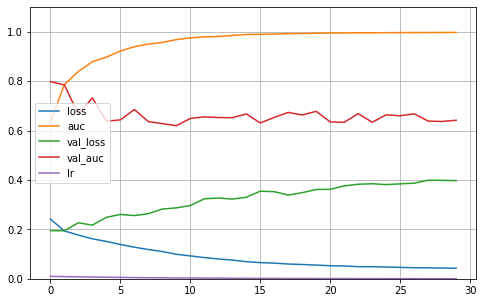

In [42]:
import matplotlib.pyplot as plt
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

The learning curve shows it is overfitting.

## (d) [12 marks]

Fit separate models using the same specification as in (c) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.001`,

(iv) dropout with probability 0.2,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (c), and for each of the models here comment on whether it is better than the model in (c).

**[Add your solution here]**

In [43]:
reset_session()
# i
model1 = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")])

In [44]:
optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model1.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
res_1 = model.fit(X_train, y_train, epochs=30, 
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(res_1.history).iloc[-11:]

,loss,auc,val_loss,val_auc
19,0.037061,0.997744,0.433728,0.651500
20,0.036454,0.997948,0.435424,0.648402
21,0.036612,0.997720,0.440464,0.646771
22,0.035727,0.997982,0.444318,0.648076
23,0.036115,0.997784,0.445730,0.647260
24,0.035835,0.997901,0.442805,0.648565
25,0.035551,0.997922,0.443962,0.644977
26,0.035000,0.997952,0.444988,0.654762
27,0.034991,0.997942,0.455614,0.649543
28,0.034601,0.997943,0.456901,0.647913


In [45]:
# ii
reset_session()
model2 = keras.models.Sequential()
for n_hidden in (200, 200, 100, 100, 50):
    model2.add(keras.layers.Dense(n_hidden, activation="elu",
                                 kernel_initializer="he_normal"))
model2.add(keras.layers.Dense(1, activation="sigmoid"))
optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model2.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["AUC"])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='auc',
                                                  mode='max', patience=10)
run_2 = model2.fit(X_train, y_train, epochs=30, 
                validation_data =(X_valid, y_valid),
                callbacks=[early_stopping_cb], 
                verbose=0)
pd.DataFrame(run_2.history).iloc[-11:]

,loss,auc,val_loss,val_auc
19,0.058405,0.990124,0.387275,0.592629
20,0.057483,0.989366,0.375193,0.615134
21,0.053640,0.991564,0.405090,0.564579
22,0.051944,0.990699,0.397597,0.532290
23,0.053488,0.992204,0.406501,0.636986
24,0.051599,0.993019,0.416124,0.609426
25,0.049535,0.991685,0.369791,0.632583
26,0.046170,0.994740,0.423418,0.595727
27,0.044461,0.993052,0.420730,0.562296
28,0.041400,0.995591,0.455073,0.570776


In [91]:
# iii
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                     activation="elu",
                     kernel_initializer="he_normal",
                     kernel_regularizer=keras.regularizers.l2(0.001))
reset_session()
model3 = keras.models.Sequential()
for n_hidden in (200, 200, 100, 100, 50):
    model3.add(RegularizedDense(n_hidden))
model3.add(keras.layers.Dense(1, activation="sigmoid", 
                               kernel_regularizer=keras.regularizers.l2(0.001)))
optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model3.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
res_3 = model3.fit(X_train, y_train, epochs=30, 
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(res_3.history).iloc[-11:]

,loss,auc,val_loss,val_auc
19,0.606591,0.931749,0.727074,0.647260
20,0.580834,0.938801,0.731760,0.630137
21,0.563246,0.934317,0.723209,0.606490
22,0.540377,0.939650,0.689933,0.663405
23,0.527437,0.930050,0.678146,0.568167
24,0.504876,0.937013,0.675902,0.609100
25,0.490270,0.934447,0.624446,0.668460
26,0.468684,0.945603,0.629763,0.632420
27,0.460482,0.937413,0.617241,0.593444
28,0.440436,0.945255,0.646946,0.555284


In [47]:
# iv
## (iv) dropout with probability 0.2
reset_session()
model4 = keras.models.Sequential()
model4.add(keras.layers.Dropout(rate=0.2))
for n_hidden in (200, 200, 100, 100, 50):
    model4.add(keras.layers.Dense(n_hidden, activation="elu",
                                 kernel_initializer="he_normal"))
    keras.layers.BatchNormalization()
    model4.add(keras.layers.Dropout(rate=0.2))
model4.add(keras.layers.Dense(1, activation="sigmoid"))
optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model4.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["AUC"])
res_4 = model4.fit(X_train, y_train, epochs=30, 
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(res_4.history).iloc[-11:]

,loss,auc,val_loss,val_auc
19,0.202673,0.758046,0.207132,0.763699
20,0.195413,0.778679,0.211865,0.729126
21,0.195602,0.779355,0.213022,0.728637
22,0.192624,0.790284,0.208898,0.753098
23,0.198521,0.769023,0.211828,0.706458
24,0.197901,0.768586,0.209718,0.730267
25,0.197451,0.777869,0.204722,0.746575
26,0.190487,0.804407,0.206622,0.735323
27,0.193868,0.787001,0.209975,0.733040
28,0.187155,0.812326,0.218294,0.726680


In [48]:
# v
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                     activation="elu",
                     kernel_initializer="he_normal",
                     kernel_regularizer=keras.regularizers.l2(0.001))
reset_session()
model5 = keras.models.Sequential()
for n_hidden in (200, 200, 100, 100, 50):
    model5.add(RegularizedDense(n_hidden))
model5.add(keras.layers.Dense(1, activation="sigmoid"))
optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model5.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["AUC"])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='auc',
                                                  mode='max', patience=10)
res_5 = model5.fit(X_train, y_train, epochs=30, 
                validation_data =(X_valid, y_valid),
                callbacks=early_stopping_cb, verbose=0)
pd.DataFrame(res_5.history).iloc[-11:]

,loss,auc,val_loss,val_auc
19,0.601281,0.933645,0.728743,0.651990
20,0.574888,0.941391,0.739134,0.593607
21,0.563113,0.933531,0.720304,0.609589
22,0.535514,0.939799,0.709157,0.639759
23,0.522086,0.931753,0.680604,0.582192
24,0.500186,0.937534,0.686488,0.607958
25,0.484851,0.936012,0.654018,0.641553
26,0.464267,0.947101,0.633350,0.632420
27,0.454924,0.939407,0.621614,0.603066
28,0.435375,0.945061,0.650451,0.562785


In [49]:
# vi
reset_session()
model6 = keras.models.Sequential()
keras.layers.BatchNormalization()
model6.add(keras.layers.Dropout(rate=0.2))
for n_hidden in (200, 200, 100, 100, 50):
    model6.add(keras.layers.Dense(n_hidden, activation="elu",
                                 kernel_initializer="he_normal"))
    model6.add
    model6.add(keras.layers.Dropout(rate=0.2))
model6.add(keras.layers.Dense(1, activation="sigmoid"))
optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model6.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
res_6 = model6.fit(X_train, y_train, epochs=30, 
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(res_6.history).iloc[-11:]

,loss,auc,val_loss,val_auc
19,0.202673,0.758046,0.207132,0.763699
20,0.195413,0.778679,0.211865,0.729126
21,0.195602,0.779355,0.213022,0.728637
22,0.192624,0.790284,0.208898,0.753098
23,0.198521,0.769023,0.211828,0.706458
24,0.197901,0.768586,0.209718,0.730267
25,0.197451,0.777869,0.204722,0.746575
26,0.190487,0.804407,0.206622,0.735323
27,0.193868,0.787001,0.209975,0.733040
28,0.187155,0.812326,0.218294,0.726680


## (e) [1 mark]

For the dropout model in (d)(iv) determine whether or not it is overfitting less than the model in (c).

**[Add your solution here]**

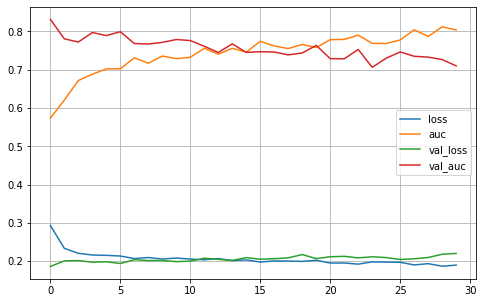

In [50]:
#d(iv)
pd.DataFrame(res_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

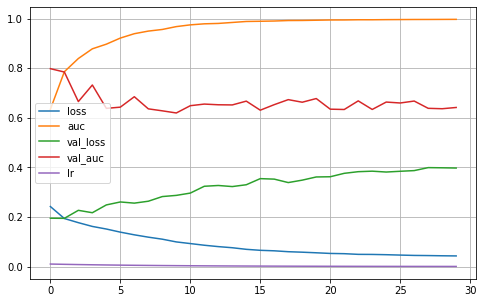

In [51]:
#c
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

The model in d(iv) is less overfitting than model in c.

## (f) [1 mark]

Of the models in (c) and (d), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (d)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

**[Add your solution here]**

In [53]:
# in (d)(v)
test_mse = model5.evaluate(X_test, y_test)
print(test_mse)

30/30 [==============================] - 0s 2ms/step - loss: 0.6175 - auc: 0.6093
[0.6174782514572144, 0.6093239784240723]


In [52]:
test_mse_c = model.evaluate(X_test, y_test)
print(test_mse_c)

30/30 [==============================] - 0s 4ms/step - loss: 0.5307 - auc: 0.5615
[0.5306558012962341, 0.5614603757858276]


The model in (d)(v) is better since it has higher AUC. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [54]:
# confusion matirx of (d)(v)
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = model5.predict(X_test)
confusion_matrix(y_true, (y_pred > 0.5))

array([[854,  22],
       [ 52,   4]])

# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2022, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/92281350/download?download_frd=1).

In [55]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2022,1,1))

In [56]:
data

,DEXJPUS
DATE,
1990-01-01,NaN
1990-01-02,146.25
1990-01-03,145.70
1990-01-04,143.37
1990-01-05,143.82
...,...
2021-12-27,114.85
2021-12-28,114.75
2021-12-29,114.97


## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**[Add your solution here]**

In [57]:
data = data.dropna()

In [58]:
train = data[data.index < datetime(2010,1,1)]
test_raw = data[data.index > datetime(2010,1,1)]
valid = test_raw[test_raw.index < datetime(2016,1,1)]
test = test_raw[test_raw.index > datetime(2016,1,1)]

In [59]:
def ts_split(ts, feature_steps=10, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X, y

In [60]:
X_train, y_train = ts_split(train, feature_steps=10, target_steps=1)
X_valid, y_valid = ts_split(valid, feature_steps=10, target_steps=1)
X_test, y_test = ts_split(test, feature_steps=10, target_steps=1)

In [61]:
X_train = X_train[:,:,-1]
X_valid = X_valid[:,:,-1]
X_test = X_test[:,:,-1]

y_train = y_train[:,:,-1]
y_valid = y_valid[:,:,-1]
y_test = y_test[:,:,-1]

## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [62]:
movement_test = X_test[:,-1] < y_test.ravel()

**[Add your solution here]**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [64]:
mse

0.3738088196839275

The mean squared error is 0.3738088196839275.

In [65]:
movement_pred = X_test[:,-1] < y_pred.ravel()

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(movement_test,movement_pred)

0.5137861466039004

The accuracy score is 0.5137861466039004.

## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**[Add your solution here]**

In [67]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras

In [68]:
reset_session()

model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model_rnn.compile(loss="mse", optimizer="nadam") 

In [69]:
run = model_rnn.fit(X_train[..., np.newaxis], y_train, epochs=100,
                validation_data=(X_valid[..., np.newaxis], y_valid),
                verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss
89,3.591288,1.419493
90,3.325146,2.030276
91,3.072608,1.041342
92,2.879261,0.744411
93,2.591041,0.558906
94,2.410072,1.589572
95,2.260275,4.533248
96,2.116478,0.650367
97,2.050760,1.693222
98,1.975142,1.852917


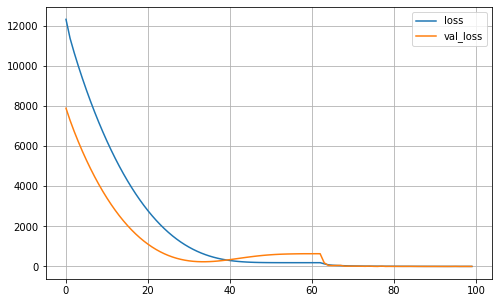

In [70]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [71]:
y_pred = model_rnn.predict(X_test[..., np.newaxis])
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.4559698234802101


The mean squared error is 0.4559698234802101.

In [73]:
movement_pred = X_test[:,-1] < y_pred.ravel()
accuracy_score(movement_test,movement_pred)

0.4969737726967048

The accuracy score is 0.4969737726967048.

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**[Add your solution here]**

In [74]:
X_train_3ahead, y_train_3ahead = ts_split(train, feature_steps=10, target_steps=3)
X_valid_3ahead, y_valid_3ahead = ts_split(valid, feature_steps=10, target_steps=3)
X_test_3ahead, y_test_3ahead = ts_split(test, feature_steps=10, target_steps=3)

In [75]:
X_train_3ahead = X_train_3ahead[:,:,-1]
X_valid_3ahead = X_valid_3ahead[:,:,-1]
X_test_3ahead = X_test_3ahead[:,:,-1]

y_train_3ahead = y_train_3ahead[:,:,-1]
y_valid_3ahead = y_valid_3ahead[:,:,-1]
y_test_3ahead = y_test_3ahead[:,:,-1]

In [76]:
reset_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(3)
])
model.compile(loss="mse", optimizer="nadam") 
run_3ahead = model.fit(X_train_3ahead, y_train_3ahead, epochs=100,
                validation_data=(X_valid_3ahead, y_valid_3ahead),
                verbose=0)

In [77]:
pd.DataFrame(run_3ahead.history).iloc[-11:]

,loss,val_loss
89,4.023217,2.634159
90,3.848800,2.776287
91,3.478850,1.589141
92,3.422472,5.212845
93,3.076504,1.621511
94,2.945980,4.762773
95,2.803193,2.063807
96,2.686125,2.201125
97,2.503860,2.098512
98,2.514158,1.557434


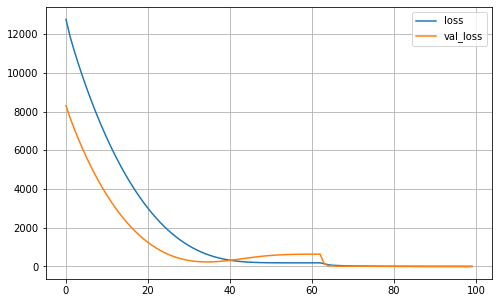

In [78]:
pd.DataFrame(run_3ahead.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [80]:
y_pred_3ahead = model.predict(X_test_3ahead[..., np.newaxis])
mse_3ahead = mean_squared_error(y_test_3ahead, y_pred_3ahead)

In [81]:
mse_3ahead

0.7284091227683439

The mean squared error is 0.7284091227683439.

In [82]:
movement_test_1 = X_test_3ahead[:,-1] < y_test_3ahead[:,0].ravel()
movement_test_2 = X_test_3ahead[:,-1] < y_test_3ahead[:,1].ravel()
movement_test_3 = X_test_3ahead[:,-1] < y_test_3ahead[:,2].ravel()
movement_test_d = np.concatenate((movement_test_1,movement_test_2,movement_test_3), axis=0)

movement_pred_1 = X_test_3ahead[:,-1] < y_pred_3ahead[:,0].ravel()
movement_pred_2 = X_test_3ahead[:,-1] < y_pred_3ahead[:,1].ravel()
movement_pred_3 = X_test_3ahead[:,-1] < y_pred_3ahead[:,2].ravel()
movement_pred_d = np.concatenate((movement_pred_1,movement_pred_2,movement_pred_3), axis=0)

In [83]:
accuracy_score(movement_test_d,movement_pred_d)

0.4920314253647587

Conclusion: mse of model in (d) is bigger than the model in (c). The accuracy in (d) is smaller than the accuracy in (c). Hence, model (c) has better performance than mdoel (d).

The accuracy now is 0.4920314253647587.